In [1]:
# installing API for retrieving data from https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.4.0-py2.py3-none-any.whl size=11692 sha256=4bff7911f276b563d0520c480ee69076aa04fd0d875898fb3f62a92b1f070457
  Stored in directory: /root/.cache/pip/wheels/40/ee/c6/d596a9661e9408440cb33adc7881461cb1d69dbb455f808f78
Successfully built cdsapi


In [2]:
# mounting google drive for any future access of files 
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
#necessary import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cdsapi


In [ ]:
# API code from dataset form from cds.climate.copernicus website 
# Need to create a <username>/.cdsapirc file in ../root/ directory

c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '2m_temperature', 'total_precipitation', 'volumetric_soil_water_layer_1',
        ],
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    'download.nc')

2021-01-04 20:33:20,266 INFO Welcome to the CDS
2021-01-04 20:33:20,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2021-01-04 20:33:20,416 INFO Request is completed
2021-01-04 20:33:20,418 INFO Downloading https://download-0004.copernicus-climate.eu/cache-compute-0004/cache/data1/adaptor.mars.internal-1609780848.0242238-20557-27-3806bb11-4aa8-46bf-973c-4d592be8ae1c.nc to download.nc (259.7M)
2021-01-04 20:35:54,904 INFO Download rate 1.7M/s


Result(content_length=272334400,content_type=application/x-netcdf,location=https://download-0004.copernicus-climate.eu/cache-compute-0004/cache/data1/adaptor.mars.internal-1609780848.0242238-20557-27-3806bb11-4aa8-46bf-973c-4d592be8ae1c.nc)

In [4]:
# combined dataset of all three dataset i.e, Temperature 2m, Total precipitation, Volumetric Soli water
# better to access from google drive if running on colab. Else we need to run the retrieve code always after session ends in colab
combined_three_datasets = xr.open_dataset('/gdrive/MyDrive/colab files/download.nc')
combined_three_datasets

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-02 18:24:09 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
# Exploring the data variables
combined_three_datasets.data_vars

Data variables:
    t2m      (time, latitude, longitude) float32 ...
    tp       (time, latitude, longitude) float32 ...
    swvl1    (time, latitude, longitude) float32 ...

In [6]:
# The dimentions of a selected dataset
combined_three_datasets['t2m'].dims

('time', 'latitude', 'longitude')

In [7]:
# Dims in ('time', 'latitude', 'longitude') order as seen in above output
combined_three_datasets['t2m'][0,0,0]
# Note the output is in DataArray format, here we accessed the first value in the dataset

<xarray.DataArray 't2m' ()>
array(nan, dtype=float32)
Coordinates:
    longitude  float32 0.0
    latitude   float32 90.0
    time       datetime64[ns] 2019-12-01T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [8]:
# lets print the shape of the datasets. Indeed they are same
print(combined_three_datasets['t2m'].shape)
print(combined_three_datasets['tp'].shape)
print(combined_three_datasets['swvl1'].shape)

(7, 1801, 3600)
(7, 1801, 3600)
(7, 1801, 3600)


In [9]:
# Here are the latitude values and they are not the actual values in dataset. 
print(combined_three_datasets['t2m']['time'].values)
print(combined_three_datasets['t2m']['latitude'].values)
print(combined_three_datasets['t2m']['longitude'].values)

['2019-12-01T12:00:00.000000000' '2019-12-02T12:00:00.000000000'
 '2019-12-03T12:00:00.000000000' '2019-12-04T12:00:00.000000000'
 '2019-12-05T12:00:00.000000000' '2019-12-06T12:00:00.000000000'
 '2019-12-07T12:00:00.000000000']
[ 90.   89.9  89.8 ... -89.8 -89.9 -90. ]
[0.000e+00 1.000e-01 2.000e-01 ... 3.597e+02 3.598e+02 3.599e+02]


In [10]:
#Printing min, max and mean temperature in all 7 days. 
for i in range(7):
  print("Day", i+1, "- Min temp:", combined_three_datasets['t2m'][i,:,:].min().values, end='    ')
  print("Max temp:", combined_three_datasets['t2m'][i,:,:].max().values, end='    ')
  print("Mean temp:", combined_three_datasets['t2m'][i,:,:].mean().values, end='    ')
  print("Median temp:", combined_three_datasets['t2m'][i,:,:].median().values)
  # The data seems like right skewed very slightly. I dont think thats too much of a concern unless we have a fully filled dataset. 

Day 1 - Min temp: 225.7352294921875    Max temp: 313.00372314453125    Mean temp: 268.46548    Median temp: 263.7310791015625
Day 2 - Min temp: 224.37083435058594    Max temp: 313.897216796875    Mean temp: 268.12436    Median temp: 263.845947265625
Day 3 - Min temp: 223.88436889648438    Max temp: 315.6190185546875    Mean temp: 267.99905    Median temp: 264.0289306640625
Day 4 - Min temp: 222.674560546875    Max temp: 313.5639343261719    Mean temp: 268.20203    Median temp: 264.23455810546875
Day 5 - Min temp: 224.18362426757812    Max temp: 313.3994140625    Mean temp: 268.28354    Median temp: 264.1523132324219
Day 6 - Min temp: 225.65863037109375    Max temp: 314.656005859375    Mean temp: 268.48834    Median temp: 264.31683349609375
Day 7 - Min temp: 226.3734588623047    Max temp: 314.3255615234375    Mean temp: 268.75888    Median temp: 265.1224060058594


In [11]:
# exploring the dataset values
combined_three_datasets['t2m'].head().values

array([[[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]]], dtype=float32)

In [12]:
# seems like there are plenty of nans. Dealing with them is really important. Lets get some insights on nans
dataset_size = combined_three_datasets['t2m'].size
dataset_nans = dataset_size - combined_three_datasets['t2m'].isnull().sum()
print("Percent of NaNs in temperature dataset:", dataset_nans.values*100/dataset_size)

dataset_size = combined_three_datasets['tp'].size
dataset_nans = dataset_size - combined_three_datasets['tp'].isnull().sum()
print("Percent of NaNs in precipitation dataset:", dataset_nans.values*100/dataset_size)

dataset_size = combined_three_datasets['swvl1'].size
dataset_nans = dataset_size - combined_three_datasets['swvl1'].isnull().sum()
print("Percent of NaNs in volumetric dataset:", dataset_nans.values*100/dataset_size)
# Noticed that nans are exactly same in number in all datasets. That means the data is not taken at those positions. 

Percent of NaNs in temperature dataset: 34.13015917083102
Percent of NaNs in precipitation dataset: 34.13015917083102
Percent of NaNs in volumetric dataset: 34.13015917083102


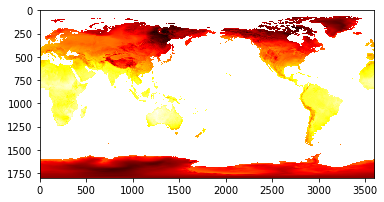

In [13]:
# better to save a dataset seperately into a variable. The heat map of this temperature dataset is also seen
combined_three_datasets_temp2m = combined_three_datasets['t2m']
plt.imshow(combined_three_datasets_temp2m[i,:,:].values, cmap='hot', interpolation='nearest')
plt.show()

('latitude', 'longitude')
(1801, 3600)


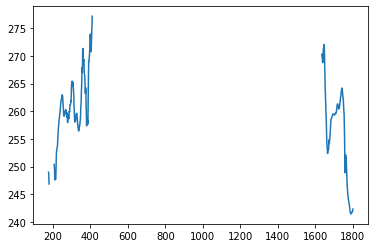

In [14]:
# lets explore this temperature 2m dataset. Let us select a day and a longitudinal line and get temperature plot along a latitude
print(combined_three_datasets_temp2m[0,:,:].dims)
print(combined_three_datasets_temp2m[0,:,:].shape)
plt.plot(combined_three_datasets_temp2m[1,:,2345].values)
plt.show()
# Well, seems like this is a big problem! What about other days? other positons? Sadly, they are almost similar. 


Here x-axis is the latidudinal axis


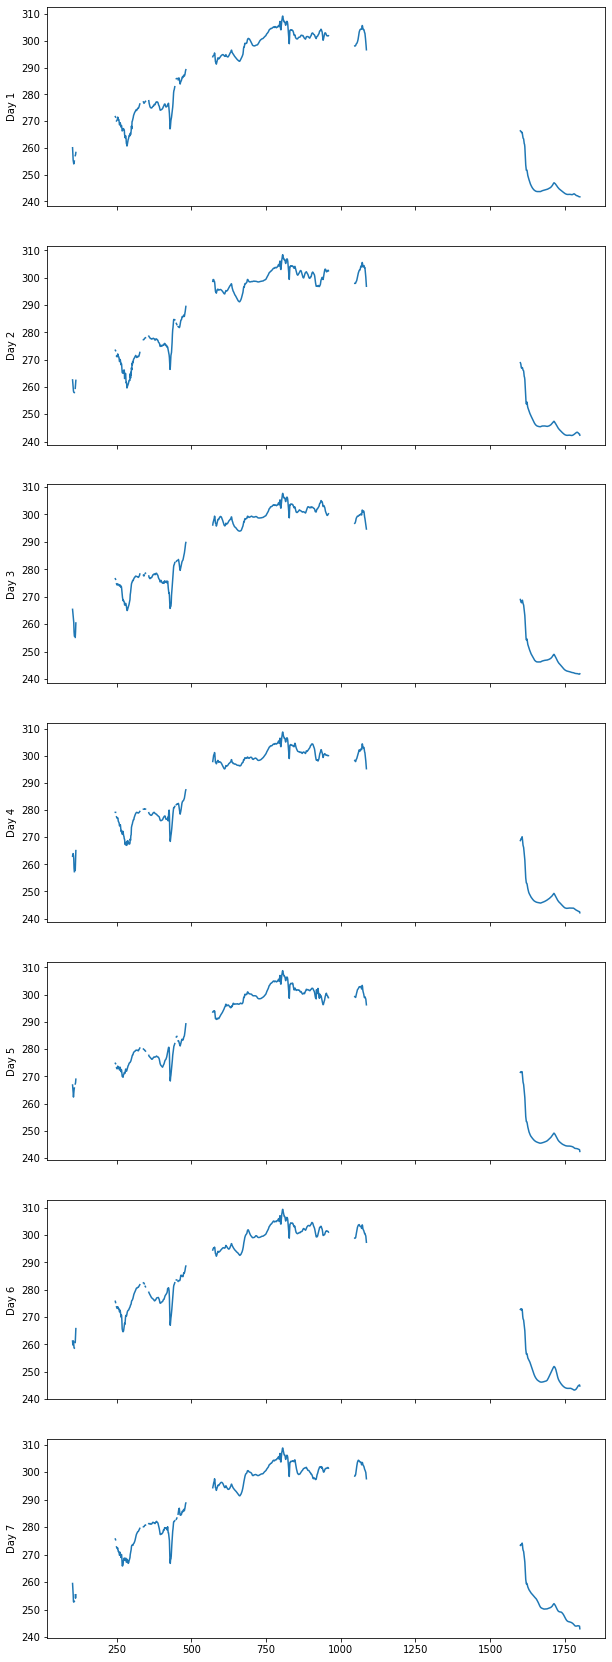

In [15]:
# let us see how the values change on each day. It would be great if we find similar plot so that interpolating along time axis
# would fill missing data and it would be easy!
print("Here x-axis is the latidudinal axis")
fig, axes = plt.subplots(nrows=7, sharex=True, figsize=(10,30))

for i in range(7):
  axes[i].plot(combined_three_datasets_temp2m[i,:,123].values)
  daystr1 = "Day "+str(i+1)
  axes[i].set(ylabel=daystr1)
plt.show()
# Sadly the plots are too similar to match almost perfectly to match nans! So, no interpolating with time axis to fill nans. 


Comparing linear and polynomial methods of Interpolation in big gaps and small gaps


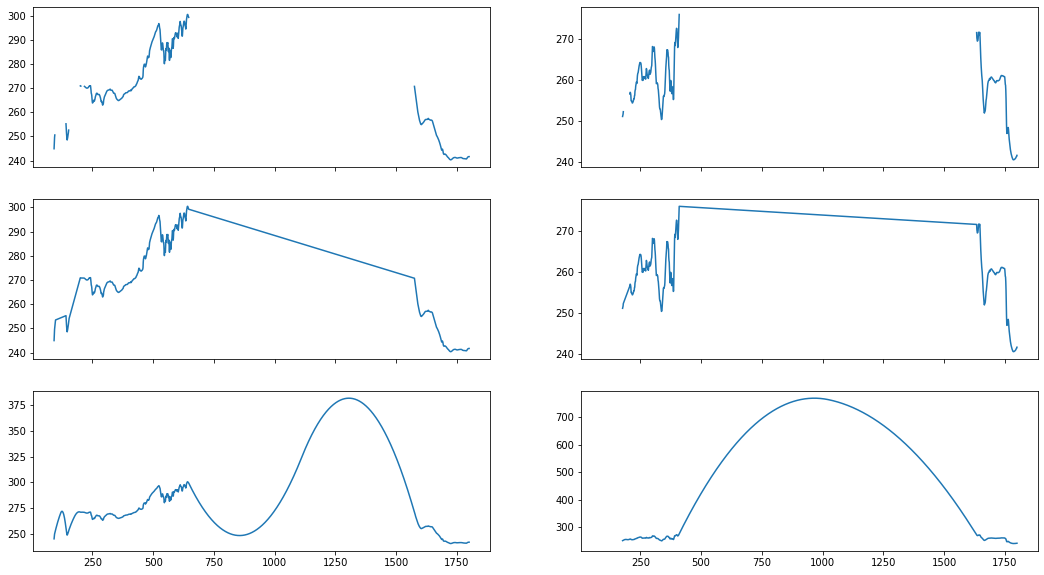

In [16]:
# Now let us see how the interpolation results are! Best ones are linear and polynomial
# but since the gap length is more, dropping thise areas of dataset is good, but still! let us give it a try with 
# linear interpolation since it looks a bit okish for continuing further. 

fig, axes = plt.subplots(nrows=3, ncols = 2, sharex=True, figsize=(18,10))
axes[0][0].plot(combined_three_datasets_temp2m[0,:,599].values)
filled = pd.Series(combined_three_datasets_temp2m[0,:,599].values).interpolate(limit=1500, method='linear', order=2)
axes[1][0].plot(filled)
filled = pd.Series(combined_three_datasets_temp2m[0,:,599].values).interpolate(limit=1500, method='polynomial', order=2)
axes[2][0].plot(filled)

axes[0][1].plot(combined_three_datasets_temp2m[0,:,2345].values)
filled = pd.Series(combined_three_datasets_temp2m[0,:,2345].values).interpolate(limit=1500, method='linear', order=2)
axes[1][1].plot(filled)
filled = pd.Series(combined_three_datasets_temp2m[0,:,2345].values).interpolate(limit=1500, method='polynomial', order=2)
axes[2][1].plot(filled)
print("Comparing linear and polynomial methods of Interpolation in big gaps and small gaps")
plt.show()

In [17]:
# Now let us linear interpolate on all the days and longitudes
for i in range(7):
  for j in range(combined_three_datasets_temp2m[i,:,0].shape[0]):
    combined_three_datasets_temp2m[i,j,:] = pd.Series(combined_three_datasets_temp2m[i,j,:].values).interpolate(limit=3000, method='linear')
  print("Linear Interpolation step finished for day", i+1)


Linear Interpolation step finished for day 1
Linear Interpolation step finished for day 2
Linear Interpolation step finished for day 3
Linear Interpolation step finished for day 4
Linear Interpolation step finished for day 5
Linear Interpolation step finished for day 6
Linear Interpolation step finished for day 7


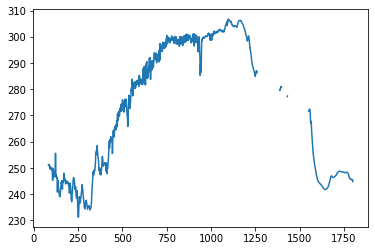

In [18]:
# let us explore how the temperatures plot look on a selected day and latitude this time. There shouldnt be any nans but 
# we still see some nans here, may be the linear interpolation step failed on the ends or corners? 
plt.plot(combined_three_datasets_temp2m[5,:,1390].values)
plt.show()

In [19]:
# Now let us linear interpolate on all the days and latitudes to cover these gaps. 
for i in range(7):
  for j in range(combined_three_datasets_temp2m[i,0,:].shape[0]):
    combined_three_datasets_temp2m[i,:,j] = pd.Series(combined_three_datasets_temp2m[i,:,j].values).interpolate(limit=3000, method='linear')
  print("Interpolation step finished for day", i+1)

Interpolation step finished for day 1
Interpolation step finished for day 2
Interpolation step finished for day 3
Interpolation step finished for day 4
Interpolation step finished for day 5
Interpolation step finished for day 6
Interpolation step finished for day 7


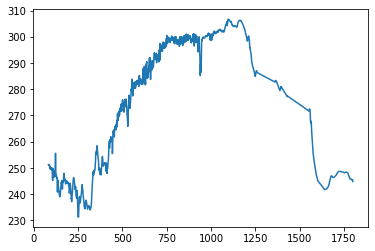

In [20]:
# Yes, we got a full plot with no nans this time. 
plt.plot(combined_three_datasets_temp2m[5,:,1390].values)
plt.show()

In [21]:
# not to forget that it is in numpy.ndarray format
combined_three_datasets_temp2m[0,:,:].values

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [241.74341, 241.74341, 241.74341, ..., 241.74341, 241.74341,
        241.74341],
       [241.74199, 241.74199, 241.74199, ..., 241.74199, 241.74199,
        241.74199],
       [241.68526, 241.68526, 241.68526, ..., 241.68526, 241.68526,
        241.68526]], dtype=float32)

In [22]:
# let us confirm if there are no nans in the dataset. 
dataset_size = combined_three_datasets_temp2m.size
dataset_nans = combined_three_datasets_temp2m.isnull().sum()
print("Percent of NaNs in temperature dataset:", dataset_nans.values*100/dataset_size)

dataset_size = combined_three_datasets_temp2m.size
dataset_nans = combined_three_datasets_temp2m.isnull().sum()
print("Percent of NaNs in precipitation dataset:", dataset_nans.values*100/dataset_size)

dataset_size = combined_three_datasets_temp2m.size
dataset_nans = combined_three_datasets_temp2m.isnull().sum()
print("Percent of NaNs in volumetric dataset:", dataset_nans.values*100/dataset_size)
# but we still see some nans after interpolation. That means, there are some range of longitudes and latitudes along which all are nans.

Percent of NaNs in temperature dataset: 4.825035474119316
Percent of NaNs in precipitation dataset: 4.825035474119316
Percent of NaNs in volumetric dataset: 4.825035474119316


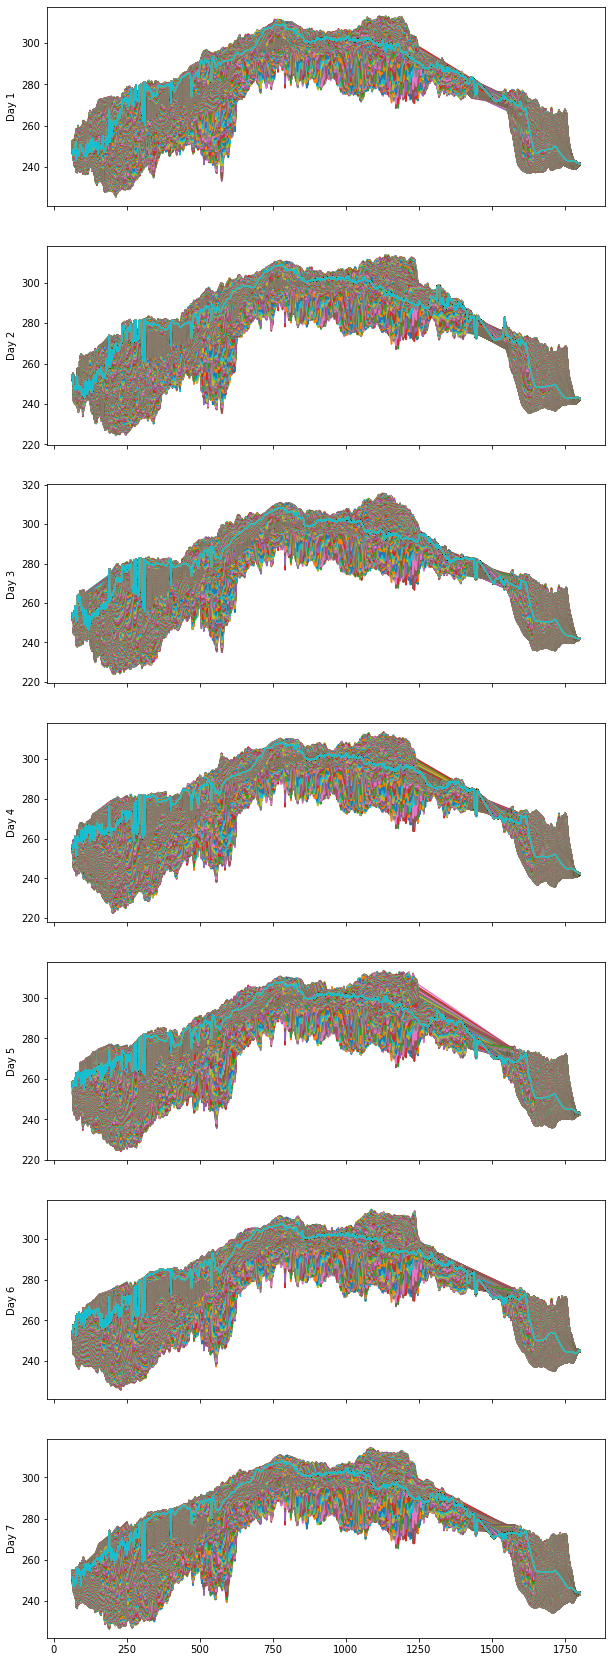

In [23]:
#let us see if there are a range of longitudes and latitudes where all are nans in all days
fig, axes = plt.subplots(nrows=7, sharex=True, figsize=(10,30))

for i in range(7):
  axes[i].plot(combined_three_datasets_temp2m[i,:,:].values)
  daystr1 = "Day "+str(i+1)
  axes[i].set(ylabel=daystr1)
plt.show()
# we can see our interpolation straight lines matching with the trend to some extent. Now its time to interpolate with time axis 

In [ ]:
# this is a code for linear interpolation in time axis, selecting each longitude and latitude. (Takes a lot of time)
for i in range(combined_three_datasets_temp2m[0,:,0].shape[0]):
  for j in range(combined_three_datasets_temp2m[0,0,:].shape[0]):
    combined_three_datasets_temp2m[0:3,i,j] = pd.Series(combined_three_datasets_temp2m[0:3,i,j].values).interpolate(limit=3000, method='linear')
  print("-",end="")

In [ ]:
# model:
#- Data for 3 or 5 days can be used instead of 7 days since the data doesnt vary a lot. 
#- Multivariate linear regression would be a good idea to continue to predict data. 
#- The dataset can be split into train:validation:test in 60:20:20 ratio. 
#- Architecture can be a pretrained model. 
#- Cross-entropy loss would be good criterion since there is no squared term to compute. 
#- Depending upon the speed we can use adam optimization model or gradient descent. We can start with Adam optimization. 


In [ ]:
#code yet to be written